In [4]:
from typing import TypedDict, Literal


class PortfolioState(TypedDict):
    amount_usd: float
    total_usd: float
    target_currency: Literal["INR", "EUR"]
    total: float


In [5]:
def calc_total(state: PortfolioState) -> PortfolioState:
    state["total_usd"] = state["amount_usd"] * 1.08
    return state


def convert_to_inr(state: PortfolioState) -> PortfolioState:
    state["total"] = state["total_usd"] * 85
    return state


def convert_to_eur(state: PortfolioState) -> PortfolioState:
    state["total"] = state["total_usd"] * 0.9
    return state


def choose_conversion(state: PortfolioState):
    return state["target_currency"]


In [7]:
from langgraph.graph import StateGraph, START, END

builder = StateGraph(PortfolioState)


builder.add_node("convert_to_inr_node", convert_to_inr)
builder.add_node("convert_to_eur_node", convert_to_eur)
builder.add_node("calc_total_node", calc_total)

builder.add_edge(START, "calc_total_node")
builder.add_conditional_edges(
    "calc_total_node",
    choose_conversion,
    {
        "INR": "convert_to_inr_node",
        "EUR": "convert_to_eur_node",
    },
)
builder.add_edge("convert_to_inr_node", END)
builder.add_edge("convert_to_eur_node", END)

graph = builder.compile()


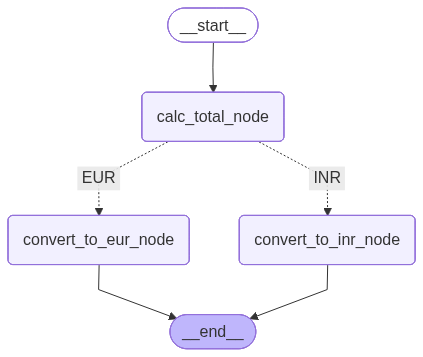

In [8]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))


In [9]:
graph.invoke({"amount_usd": 100, "target_currency": "INR"})


{'amount_usd': 100,
 'total_usd': 108.0,
 'target_currency': 'INR',
 'total': 9180.0}

In [ ]:
graph.invoke({"amount_usd": 100, "target_currency": "EUR"})


{'amount_usd': 100,
 'total_usd': 108.0,
 'target_currency': 'EUR',
 'total': 97.2}